In [110]:


import numpy as np
from tqdm import tqdm
import random
import gym
from gym.wrappers import RecordVideo
import glob
import io
import matplotlib.pyplot as plt
from IPython.display import HTML

In [111]:
#Setting up the environment
env=gym.make("Taxi-v3",render_mode='ansi')

env.reset()
#Current State
#state is in the form of [taxi_row,taxi_col,passenger_location,destination]
# passenger locations        # Destinations
# 0: R(ed)                   # 0: R(ed) 
# 1: G(reen)                 # 1: G(reen)
# 2: Y(ellow)                # 2: Y(ellow)
# 3: B(lue)                  # 3: B(lue)
# 4: in taxi

# 0,0 is top left

action = ["south", "north", "east", "west",'pickup','drop']
#correspond to [0,1,2,3,4,5] that's actually passed to the environment

In [112]:


def egreedy_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,10)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action
def egreedy__option_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,4)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action

def position(state):
  state_row,state_col,_,_=list(env.decode(state))
  pos=[state_row,state_col]
  state_no=state_row*5+state_col
  return pos,state_no

# SMDP for the given options

In [113]:

q_values_SMDP = np.zeros((500,10))
R_option_policy=np.zeros((25,4)) # action 6
G_option_policy=np.zeros((25,4)) # action 7 
B_option_policy=np.zeros((25,4)) # action 8 
Y_option_policy=np.zeros((25,4)) # action 9
#### SMDP Q-Learning 

# Add parameters you might need here
gamma = 0.9
alpha=0.1
epsilon=0.1
eps1=0.1
eps2=0.1
eps3=0.1
eps4=0.1
decay=0.96
eps_min=0.01
episode_rewards = []
# Iterate over 1000 episodes
for _ in tqdm(range(10000)):
    state,_ = env.reset()   
    total_reward = 0

    done = False
    step_count=0

    # While episode is not over
    while not done :
        step_count+=1
        
        # Choose action        
        action = egreedy_policy(q_values_SMDP, state,epsilon)
        epsilon=max(eps_min,epsilon*decay)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward,done,_,_ = env.step(action)
            q_values_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
            total_reward += reward
            state=next_state
        # Checking if action chosen is an option
        reward_bar = 0
        s_state=state
        if action == 6: # action => red
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            red_pos=[0,0]
            if pos==red_pos:
                q_values_SMDP[state][6]=-100
                continue
            while pos !=  red_pos :
    
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(R_option_policy,state_no,eps1)
                eps1=max(eps_min,eps1*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward += reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                reward_bar +=(gamma**k)*reward
                if next_state_pos==red_pos:
                    reward=10
                R_option_policy[state_no][action] += alpha * (reward + gamma * np.max(R_option_policy[next_state_no]) - R_option_policy[state_no][action])
                
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]

            q_values_SMDP[s_state][6] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][6])
            
        if action == 7: # action => Green
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            green_pos=[0,4]
            if pos==green_pos:
                q_values_SMDP[state][7]=-100
                continue
         
            while pos !=  green_pos :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(G_option_policy,state_no,eps2)
                eps2=max(eps_min,eps2*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward += reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col

                next_state_pos=[state_row,state_col]
                reward_bar +=(gamma**k)*reward
                if next_state_pos==green_pos:
                    reward=10
                G_option_policy[state_no][action] += alpha * (reward + gamma * np.max(G_option_policy[next_state_no]) - G_option_policy[state_no][action])
                
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]
            q_values_SMDP[s_state][7] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][7])
            

        if action == 8: # action => Blue
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            blue_pos=[4,3]
            if pos==blue_pos:
                q_values_SMDP[state][8]=-100
                continue
    
            while pos !=  blue_pos :
           
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(B_option_policy,state_no,eps3)
                eps3=max(eps_min,eps3*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward += reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col

                next_state_pos=[state_row,state_col]
                reward_bar +=(gamma**k)*reward
                if next_state_pos==blue_pos:
                    reward=10
                B_option_policy[state_no][action] += alpha * (reward + gamma * np.max(B_option_policy[next_state_no]) - B_option_policy[state_no][action])

                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]
            q_values_SMDP[s_state][8] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][8])
        
        if action == 9: # action => Yellow
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            yellow_pos=[4,0]
            if pos==yellow_pos:
                q_values_SMDP[state][9]=-100
                continue

            while pos !=  yellow_pos :
    
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(Y_option_policy,state_no,eps4)
                eps4=max(eps_min,eps4*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward += reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col

                next_state_pos=[state_row,state_col]
                reward_bar +=(gamma**k)*reward
                if next_state_pos==yellow_pos:
                    reward=10
                Y_option_policy[state_no][action] += alpha * (reward + gamma * np.max(Y_option_policy[next_state_no]) - Y_option_policy[state_no][action])
                
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]
            q_values_SMDP[s_state][9] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][9])
            
    episode_rewards.append(total_reward)
    


  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\Shobhith Vadlamudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 10000/10000 [00:06<00:00, 1634.99it/s]


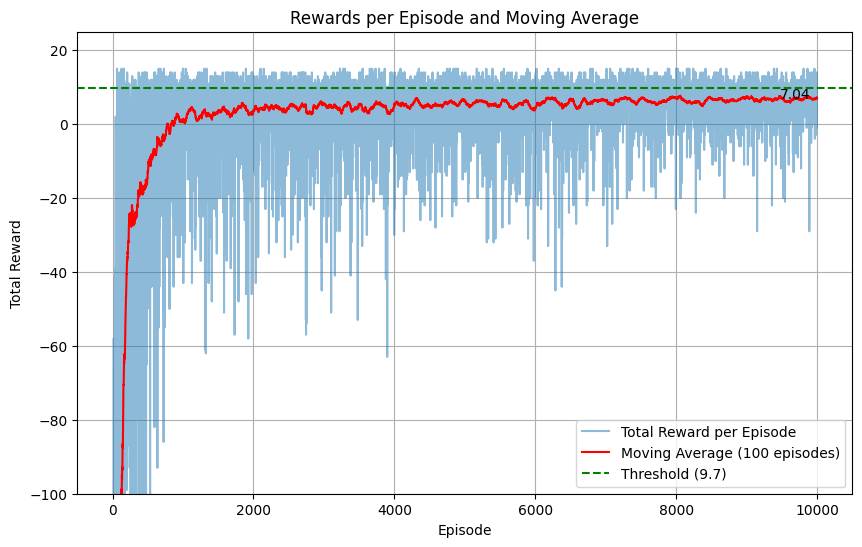

In [114]:
# Calculate the moving average of the last 100 episodes
moving_avg = np.convolve(episode_rewards, np.ones(100)/100, mode='valid')

# Visualize the rewards per episode and the moving average
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label='Total Reward per Episode', alpha=0.5)
plt.plot(range(100, len(episode_rewards)+1), moving_avg, color='red', label='Moving Average (100 episodes)')
plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.ylim(-100,25)
plt.grid(True)
last_value = moving_avg[-1]
plt.text(len(moving_avg) - 1, last_value, f'{last_value}', ha='right')
plt.show()

In [115]:
print(moving_avg[-1])

7.04


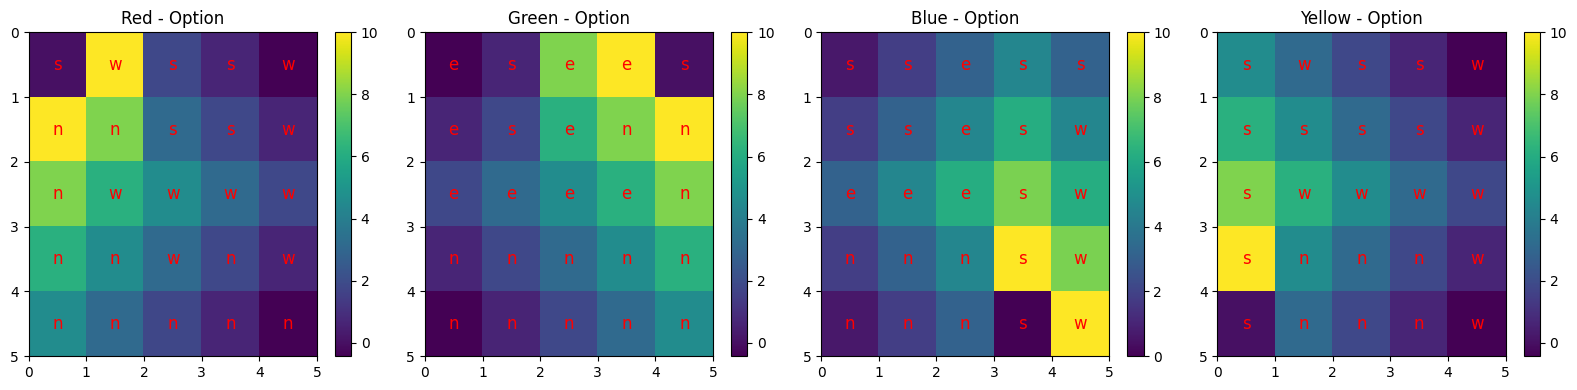

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def plot_Q(Q_values, color_names, message="Q plot"):
    actions = ["south", "north", "east", "west"]

    fig, axes = plt.subplots(1, len(Q_values), figsize=(16, 4)) 

    for ax, q_value, color_name in zip(axes, Q_values, color_names):
        q_plot = np.zeros((5, 5, 4))
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                q_plot[i, j] = q_value[state_num]

        ax.set_title(f"{color_name} - {message}") 
        ax.pcolor(q_plot.max(-1), edgecolors='k', linewidths=2)
        plt.colorbar(ax.pcolor(q_plot.max(-1)), ax=ax)
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                if message == "Update Frequency":
                    anno = f'{np.sum(q_plot[i, j])}'
                    size = 'small'
                else:
                    anno = actions[np.argmax(q_plot[i, j])][0]
                    size = 'large'
                ax.text(j + 0.5, i + 0.5, anno, ha='center', va='center', color='red', size=size)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

# Example usage
plot_Q([R_option_policy, G_option_policy, B_option_policy, Y_option_policy], ["Red", "Green", "Blue", "Yellow"], "Option")


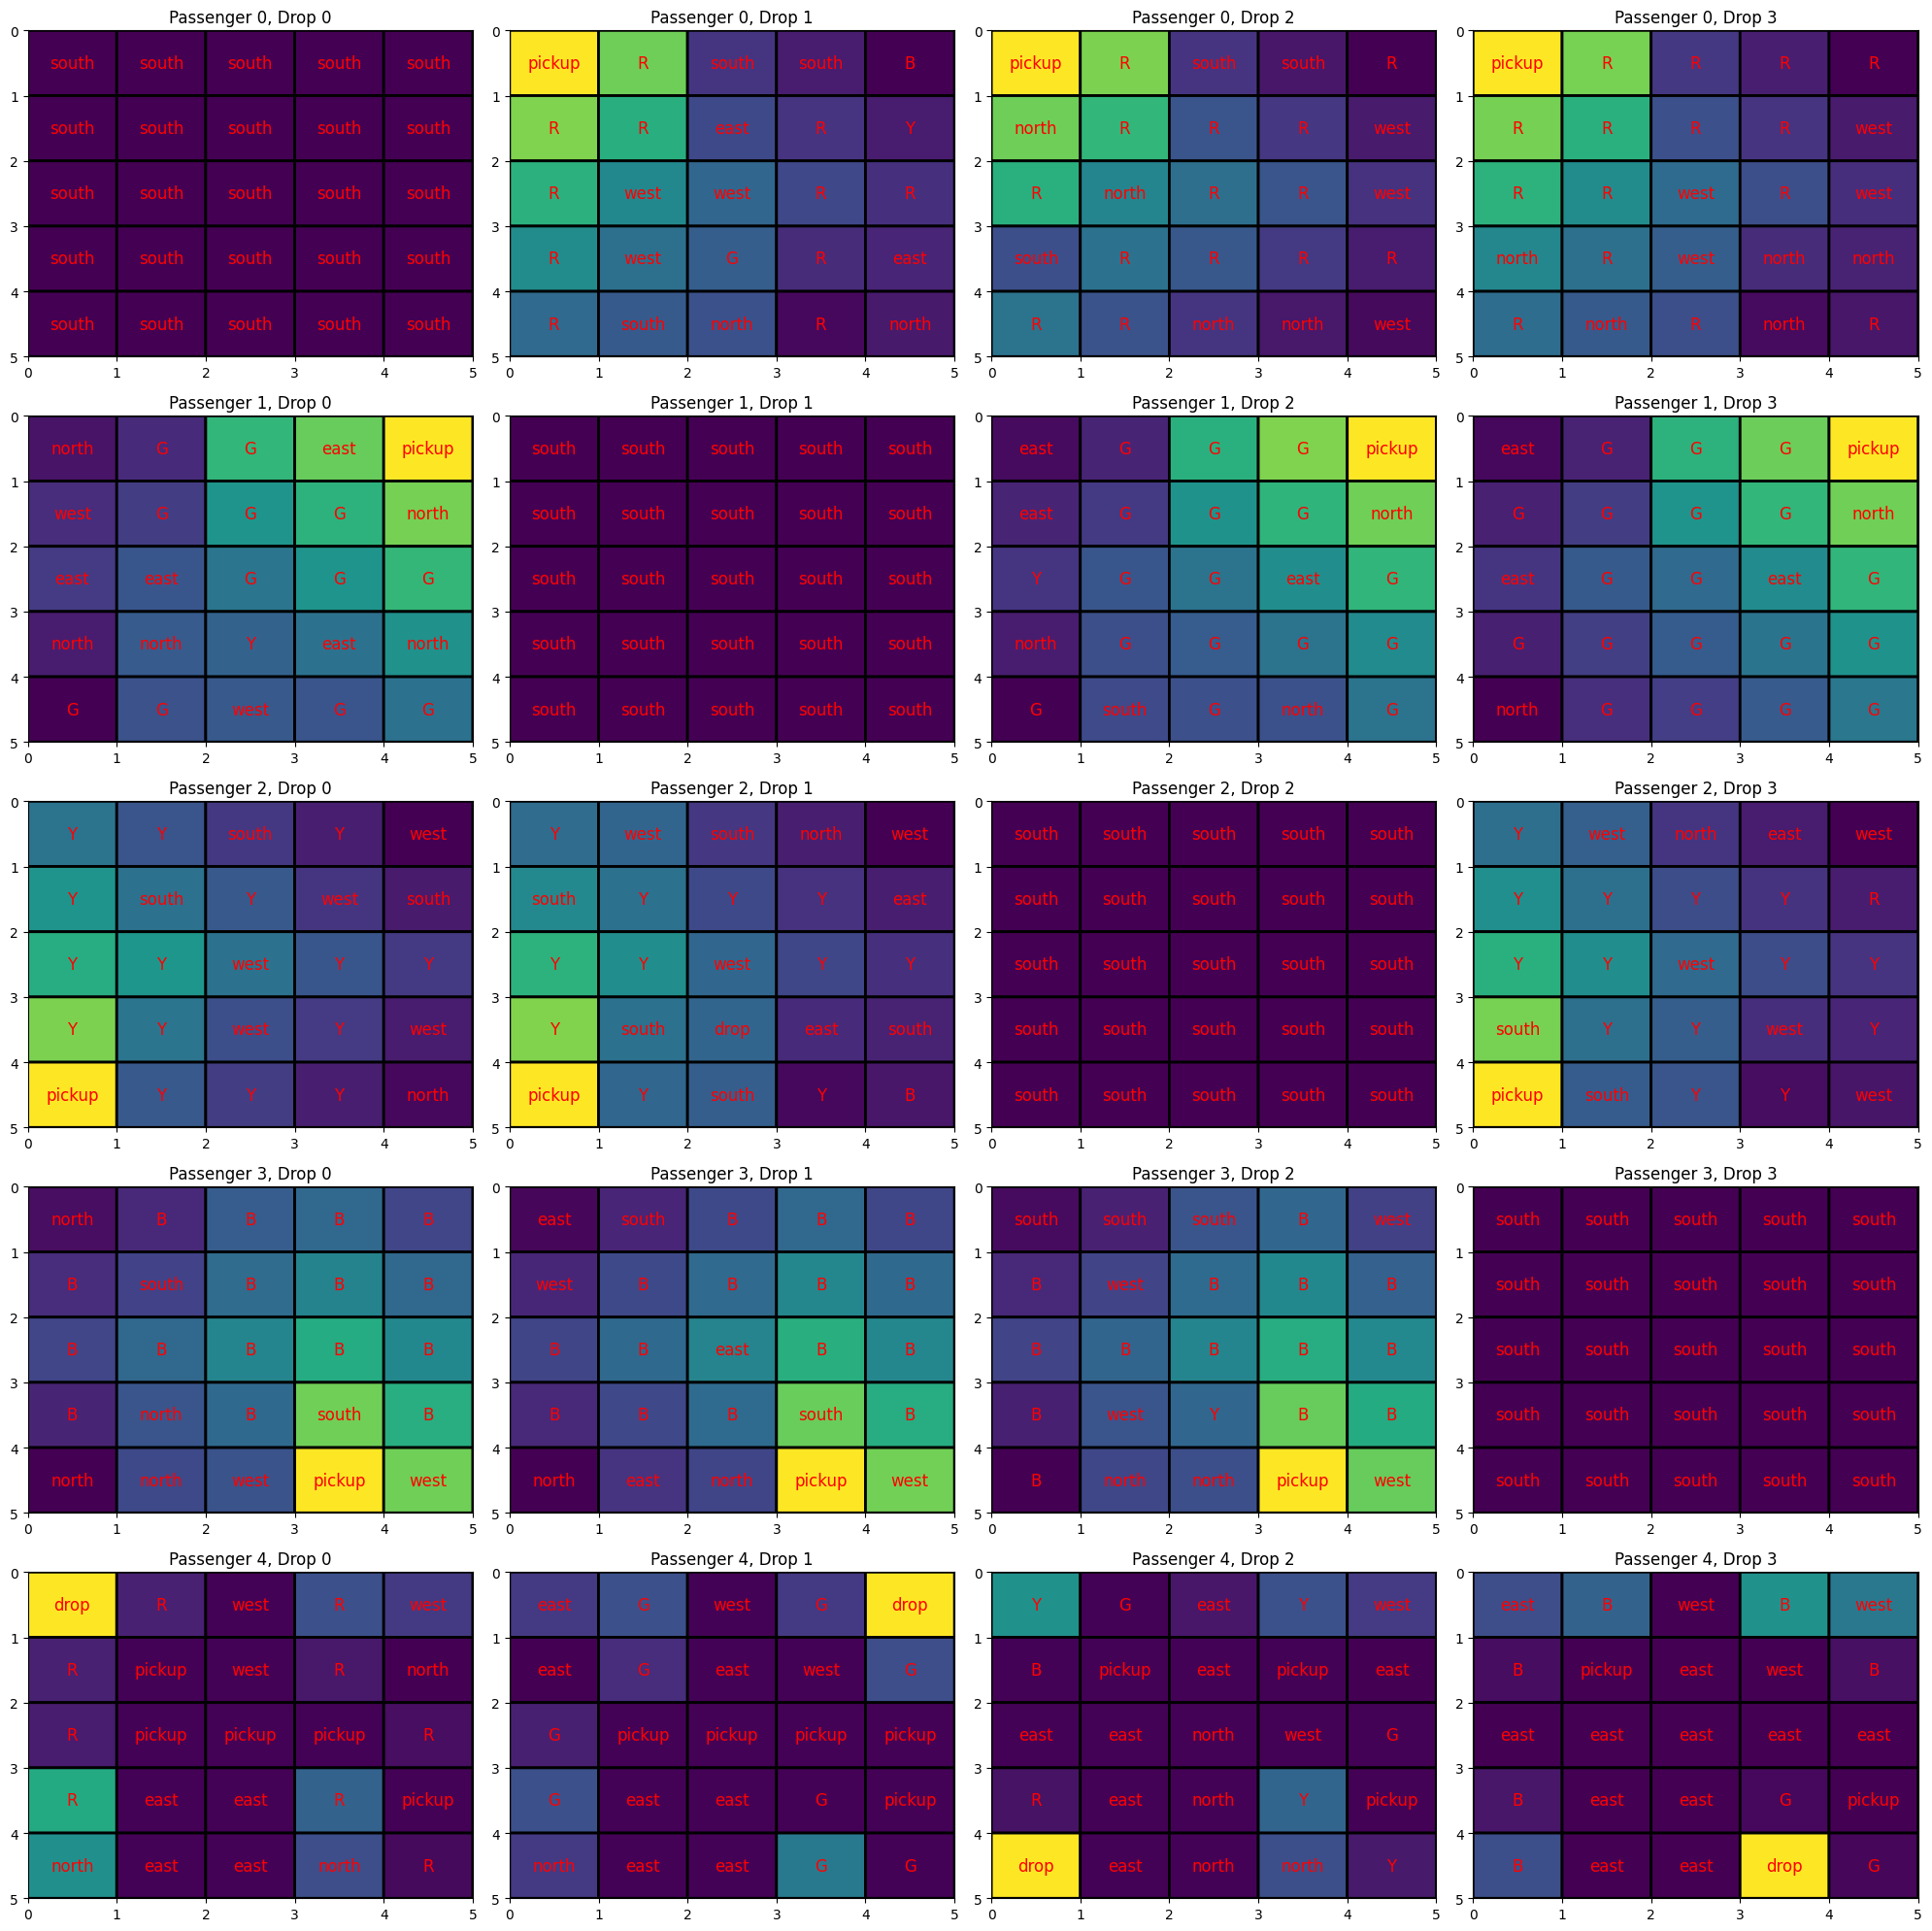

In [117]:

def visualize_SMDP_Q(q_values):
    actions = ["south", "north", "east", "west", 'pickup', 'drop', 'R', 'G', 'B', "Y"]
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    for p in range(5):
        for d in range(4):
            Q = np.zeros((5, 5, 10))
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    Q[r, c] = q_values[state_num]

            ax = axes[p, d]
            ax.set_title(f"Passenger {p}, Drop {d}")
            ax.pcolor(Q.max(-1), edgecolors='k', linewidths=2)
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    anno = actions[np.argmax(Q[r, c])]
                    ax.text(c + 0.5, r + 0.5, anno, ha='center', va='center', color='red', size='large')
            ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


visualize_SMDP_Q(q_values_SMDP)


## Intra-option Q-Learning for given options

In [134]:
# define e-greedy policy
q_values_Intra = np.zeros((500,10))
q_red=np.zeros((25,4))
q_green=np.zeros((25,4))
q_blue=np.zeros((25,4))
q_yellow=np.zeros((25,4))
option_q_values = [q_red,q_green,q_blue,q_yellow]

def opt_done(state,x):
    optdone=False
    state_row,state_col,_,_=list(env.decode(state))
    pos=[state_row,state_col]
    if pos==goal_pos[x]:
        optdone=True
    return optdone


def egreedy_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,10)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action
def egreedy__option_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,4)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action

def position(state):
  state_row,state_col,_,_=list(env.decode(state))
  pos=[state_row,state_col]
  state_no=state_row*5+state_col
  return pos,state_no

option_q_values = [q_red,q_green,q_blue,q_yellow]


# Add parameters you might need here
gamma = 0.9
alpha=0.1
alpha_opt = 0.2
epsilon=0.2
eps1=0.1
eps2=0.1
eps3=0.1
eps4=0.1
decay=0.99
eps_min=0.01
episode_rewards_intra = []
goal_pos=[[0,0],[0,4],[4,3],[4,0]]

# Iterate over 1000 episodes
for _ in tqdm(range(10000)):
    state,_ = env.reset()   
    total_reward_intra= 0

    done = False
    step_count=0

    # While episode is not over
    while not done :
        step_count+=1

        # Choose action        
        action = egreedy_policy(q_values_Intra, state,epsilon)
        epsilon=max(eps_min,epsilon*decay)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward,done,_,_ = env.step(action)
            q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            grid_state = state_row*5 + state_col
            next_state_row,next_state_col,_,_=list(env.decode(next_state))
            grid_next_state = next_state_row*5 + next_state_col
            next_state_pos=[next_state_row,next_state_col]

            for i in range(len(option_q_values)):
                if np.argmax(option_q_values[i][grid_state]) == action:
                    if next_state_pos==goal_pos[i]:
                        q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                    else:
                        q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])

            total_reward_intra += reward
            state=next_state
            
        if action == 6: # action => red
            k=0
            
            if opt_done(state,0):
                q_values_Intra[state][6]=-100
                continue
            
         
            while not opt_done(state,0) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_red,state_no,eps1)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                
                for i in range(len(option_q_values)):
                    if i==0:
                        if next_state_pos==red_pos:
                            q_values_Intra[state][6] += alpha * (reward +  gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][6])
                        else:
                            q_values_Intra[state][6] += alpha * (reward + gamma * q_values_Intra[next_state][6] - q_values_Intra[state][6])
                    else:
                        np.argmax(option_q_values[i][state_no]) == action
                        if next_state_pos==goal_pos[i]:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                        else:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])



                q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                if next_state_pos==red_pos:
                    reward=10
                q_red[state_no][action] += alpha_opt * (reward + gamma * np.max(q_red[next_state_no]) - q_red[state_no][action])

                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]

        if action == 7: # action => green
            k=0
            if opt_done(state,1):
                q_values_Intra[state][7]=-100
                continue
         
            while not opt_done(state,1) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_green,state_no,eps2)
                eps2=max(eps_min,eps2*decay)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                for i in range(len(option_q_values)):
                    if i==1:
                        if next_state_pos==green_pos:
                            q_values_Intra[state][7] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][7])
                        else:
                            q_values_Intra[state][7] += alpha * (reward + gamma * q_values_Intra[next_state][7] - q_values_Intra[state][7])
                    else:
                        np.argmax(option_q_values[i][state_no]) == action
                        if next_state_pos==goal_pos[i]:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                        else:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])

                q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                if next_state_pos==green_pos:
                    reward=10
                q_green[state_no][action] += alpha_opt * (reward + gamma * np.max(q_green[next_state_no]) - q_green[state_no][action])
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]

        
        if action == 8: # action => blue
            k=0
            if opt_done(state,2):
                q_values_Intra[state][8]=-100
                continue
         
            while not opt_done(state,2) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_blue,state_no,eps2)
                eps2=max(eps_min,eps2*decay)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                for i in range(len(option_q_values)):
                    if i==1:
                        if next_state_pos==blue_pos:
                            q_values_Intra[state][8] += alpha * (reward +gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][8])
                        else:
                            q_values_Intra[state][8] += alpha * (reward + gamma * q_values_Intra[next_state][8] - q_values_Intra[state][8])
                    else:
                        np.argmax(option_q_values[i][state_no]) == action
                        if next_state_pos==goal_pos[i]:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                        else:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])

                q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                
                if next_state_pos==blue_pos:
                    reward=10
                
                q_blue[state_no][action] += alpha_opt * (reward + gamma * np.max(q_blue[next_state_no]) - q_blue[state_no][action])
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]
        
        if action == 9: # action => yellow
            k=0
            if opt_done(state,3):
                q_values_Intra[state][9]=-100
                continue
         
            while not opt_done(state,3) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_yellow,state_no,eps2)
                eps2=max(eps_min,eps2*decay)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                for i in range(len(option_q_values)):
                    if i==1:
                        if next_state_pos==yellow_pos:
                            q_values_Intra[state][7] += alpha * (reward +gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][7])
                        else:
                            q_values_Intra[state][7] += alpha * (reward + gamma * q_values_Intra[next_state][7] - q_values_Intra[state][7])
                    else:
                        np.argmax(option_q_values[i][state_no]) == action
                        if next_state_pos==goal_pos[i]:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                        else:
                            q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])

                q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                if next_state_pos==yellow_pos:
                    reward=10

                q_yellow[state_no][action] += alpha_opt * (reward + gamma * np.max(q_yellow[next_state_no]) - q_yellow[state_no][action])
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]
        

    episode_rewards_intra.append(total_reward_intra)
   
    



  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:09<00:00, 1074.95it/s]


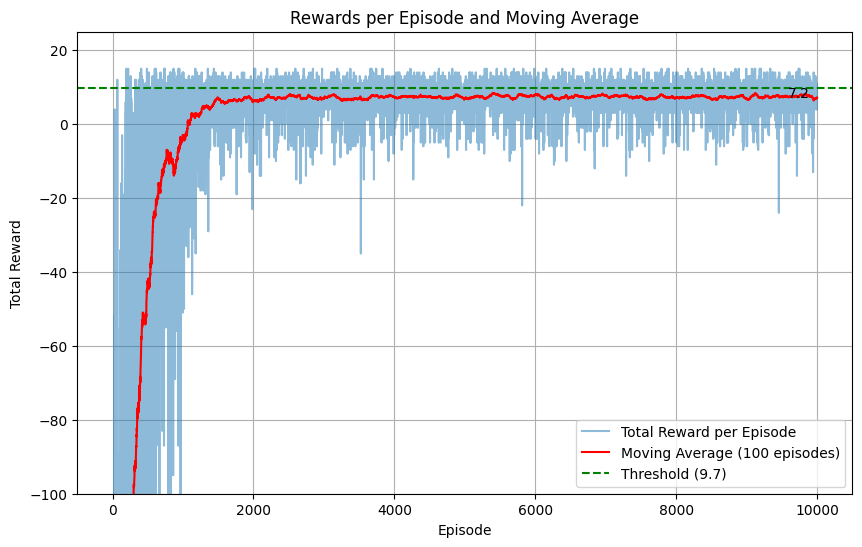

In [135]:
# Calculate the moving average of the last 100 episodes
moving_avg_intra = np.convolve(episode_rewards_intra, np.ones(100)/100, mode='valid')

# Visualize the rewards per episode and the moving average
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_intra, label='Total Reward per Episode', alpha=0.5)
plt.plot(range(100, len(episode_rewards_intra)+1), moving_avg_intra, color='red', label='Moving Average (100 episodes)')
plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.ylim(-100,25)
last_value = moving_avg_intra[-1]
plt.text(len(moving_avg) - 1, last_value, f'{last_value}', ha='right')
plt.show()

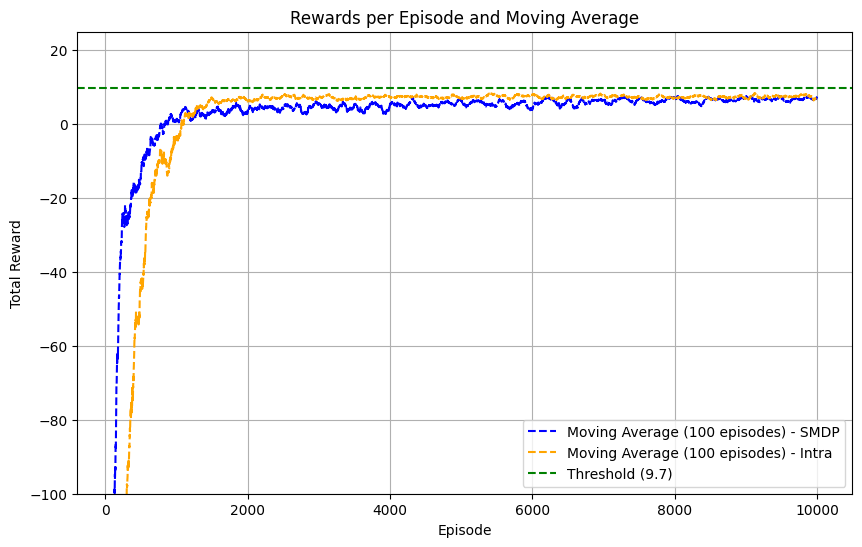

In [136]:
plt.figure(figsize=(10, 6))
#plt.plot(episode_rewards, label='Total Reward per Episode', alpha=0.5, color='blue')
plt.plot(range(100, len(episode_rewards)+1), moving_avg, color='blue', linestyle='--', label='Moving Average (100 episodes) - SMDP')

#plt.plot(episode_rewards_intra, label='Total Reward per Episode (Intra)', alpha=0.5, color='orange')
plt.plot(range(100, len(episode_rewards_intra)+1), moving_avg_intra, color='orange', linestyle='--', label='Moving Average (100 episodes) - Intra')

plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.ylim(-100, 25)
plt.show()

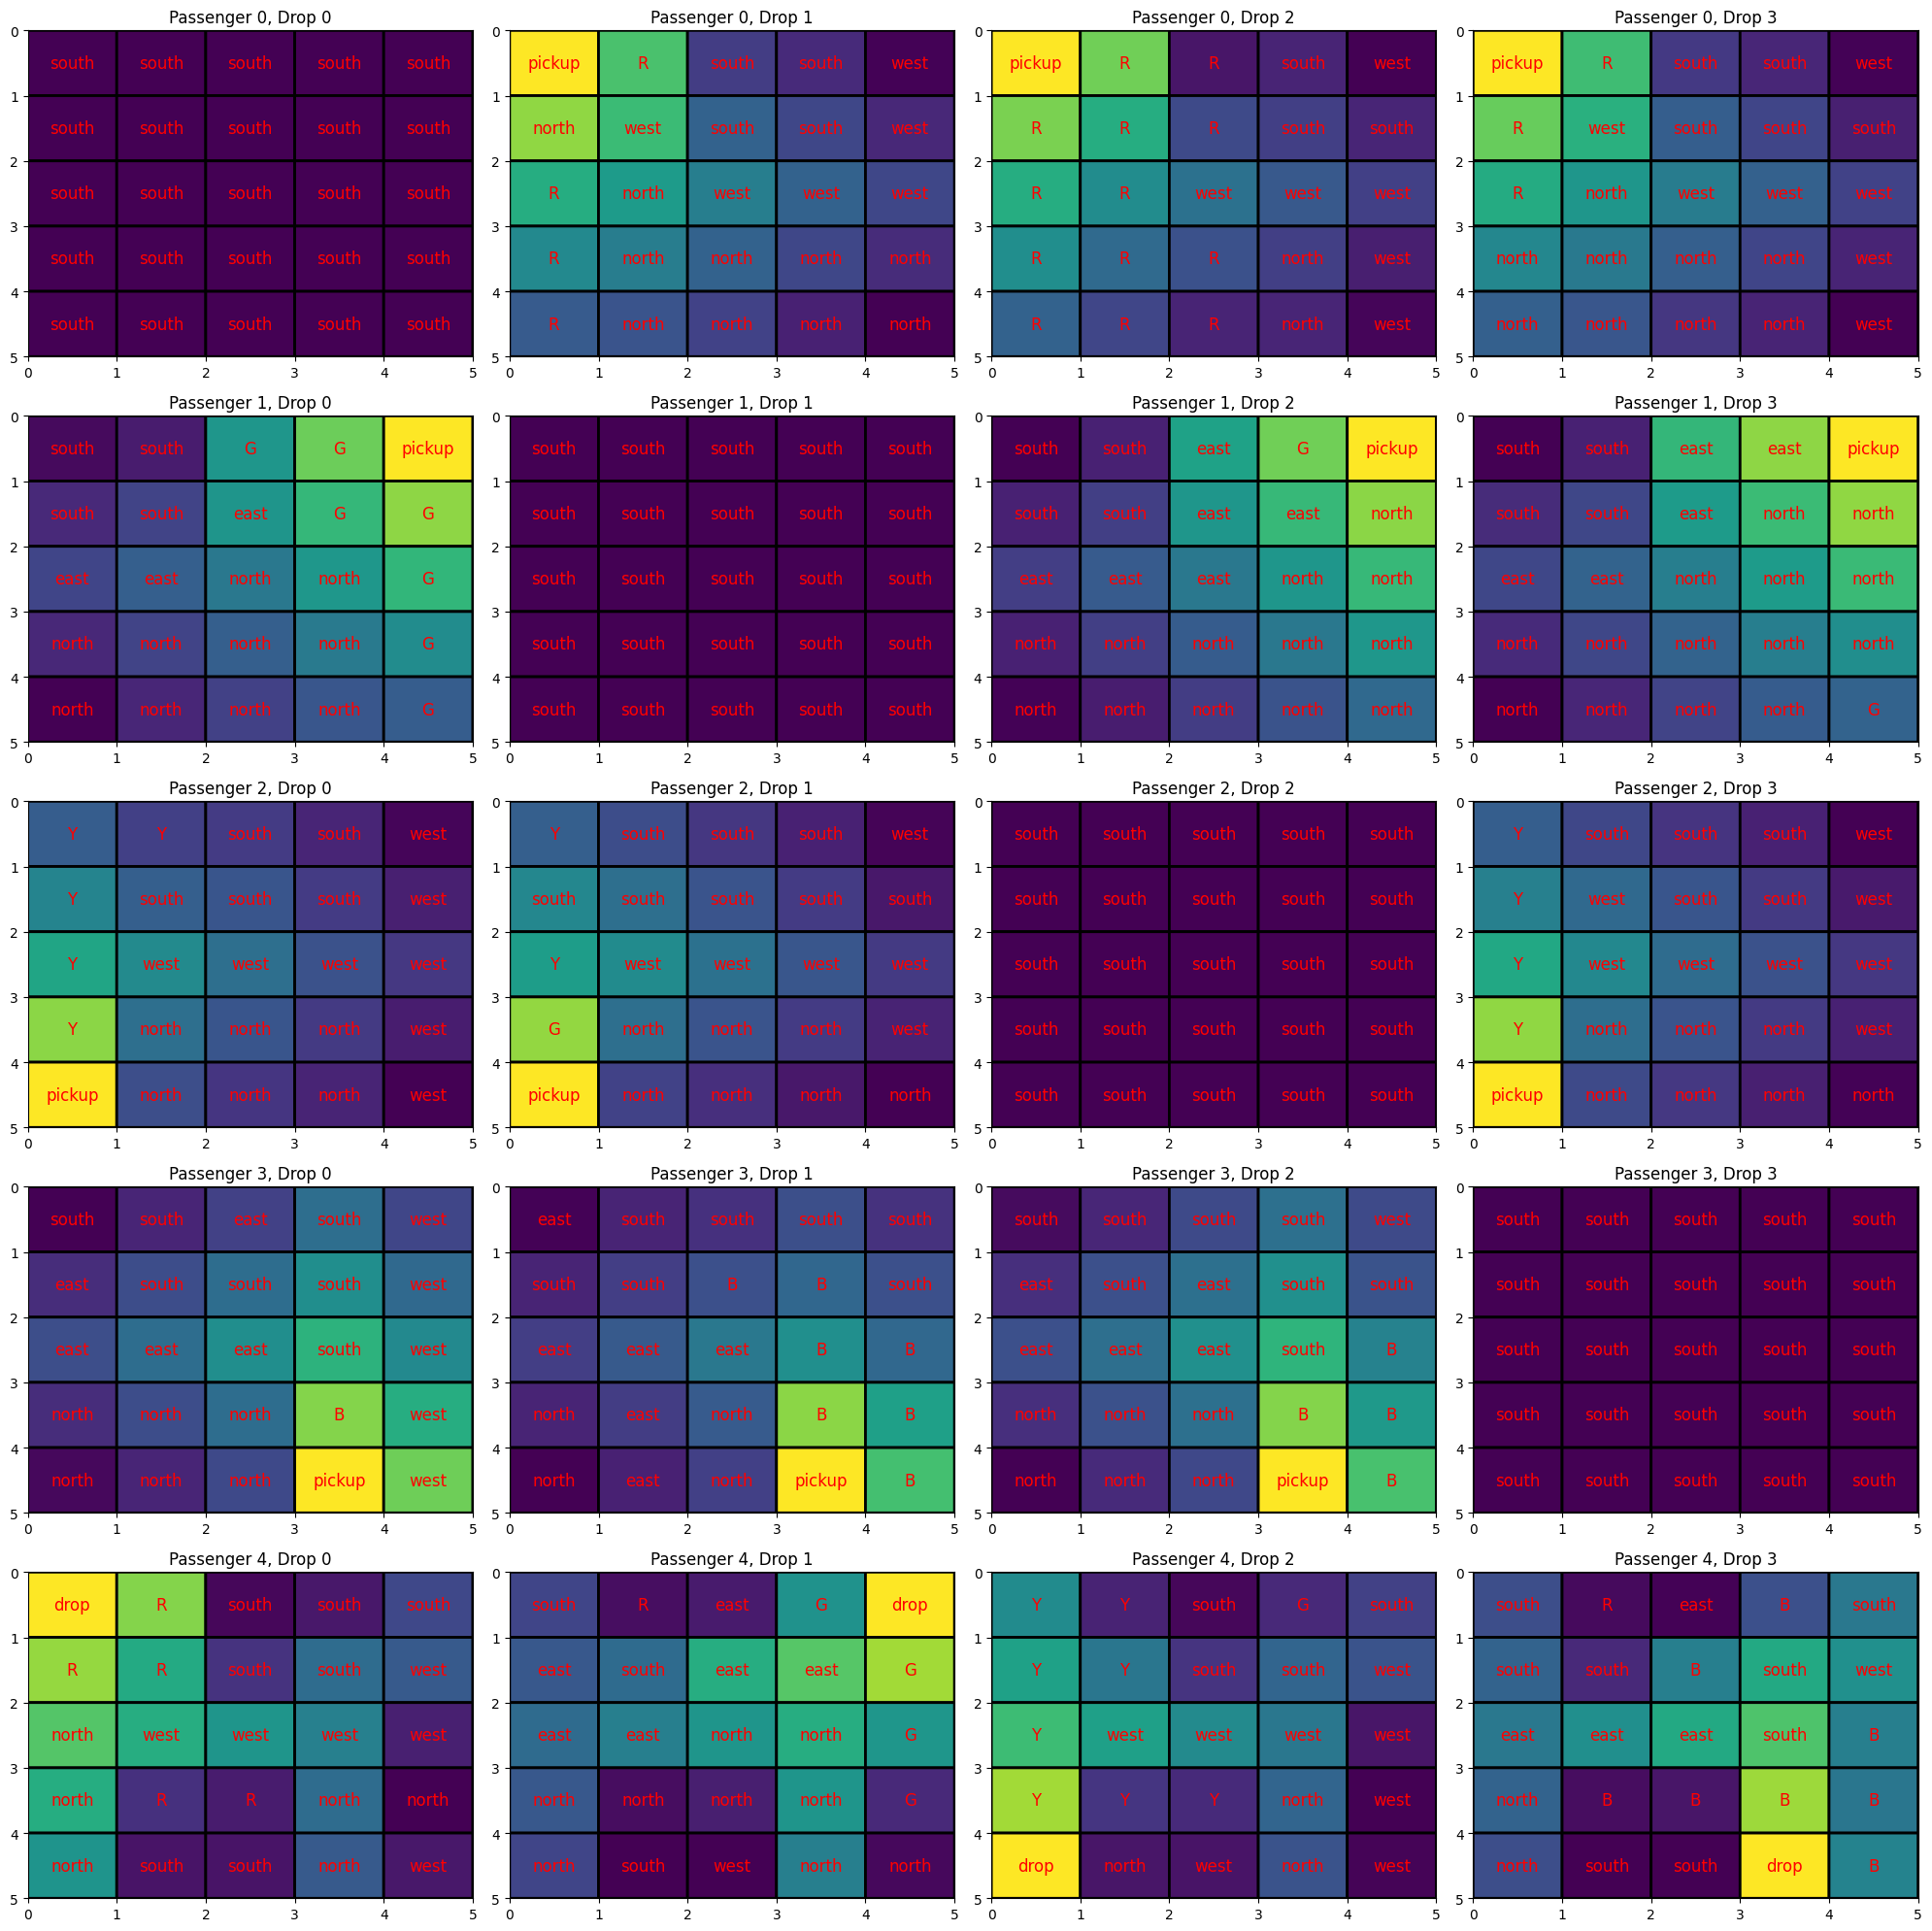

In [121]:

def visualize_SMDP_Q(q_values):
    actions = ["south", "north", "east", "west", 'pickup', 'drop', 'R', 'G', 'B', "Y"]
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    for p in range(5):
        for d in range(4):
            Q = np.zeros((5, 5, 10))
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    Q[r, c] = q_values[state_num]

            ax = axes[p, d]
            ax.set_title(f"Passenger {p}, Drop {d}")
            ax.pcolor(Q.max(-1), edgecolors='k', linewidths=2)
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    anno = actions[np.argmax(Q[r, c])]
                    ax.text(c + 0.5, r + 0.5, anno, ha='center', va='center', color='red', size='large')
            ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


visualize_SMDP_Q(q_values_Intra)


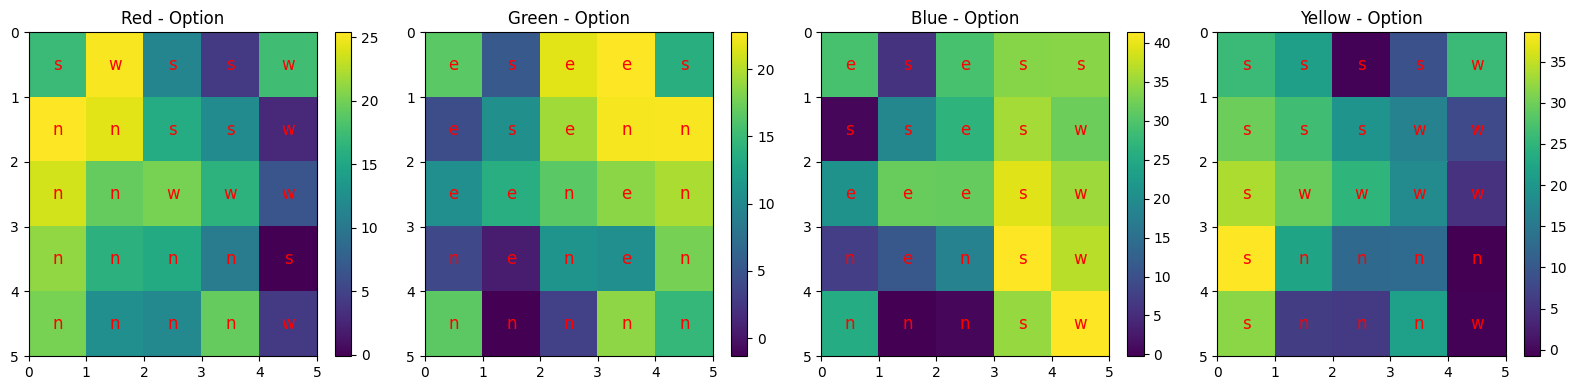

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def plot_Q(Q_values, color_names, message="Q plot"):
    actions = ["south", "north", "east", "west"]

    fig, axes = plt.subplots(1, len(Q_values), figsize=(16, 4)) 

    for ax, q_value, color_name in zip(axes, Q_values, color_names):
        q_plot = np.zeros((5, 5, 4))
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                q_plot[i, j] = q_value[state_num]

        ax.set_title(f"{color_name} - {message}") 
        ax.pcolor(q_plot.max(-1), edgecolors='k', linewidths=2)
        plt.colorbar(ax.pcolor(q_plot.max(-1)), ax=ax)
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                if message == "Update Frequency":
                    anno = f'{np.sum(q_plot[i, j])}'
                    size = 'small'
                else:
                    anno = actions[np.argmax(q_plot[i, j])][0]
                    size = 'large'
                ax.text(j + 0.5, i + 0.5, anno, ha='center', va='center', color='red', size=size)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_Q([q_red,q_green,q_blue,q_yellow], ["Red", "Green", "Blue", "Yellow"], "Option")


# Alternate set of Options

SMDP

In [123]:

q_values_SMDP = np.zeros((500,8))
q_centre_left=np.zeros((25,4))
q_centre_right=np.zeros((25,4))

# def egreedy_policy(Q,state,eps):
#     softmax_vals = [np.exp((Q[state][action] - np.max(Q[state]))/eps) for action in range(len(Q[state]))]
#     softmax_vals /= sum(softmax_vals)
#     return np.random.choice(len(Q[state]), p=softmax_vals)
def egreedy_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,8)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action
def egreedy__option_policy(Q,state,eps):
#     softmax_vals = [np.exp((Q[state][action] - np.max(Q[state]))/eps) for action in range(len(Q[state]))]
#     softmax_vals /= sum(softmax_vals)
#     return np.random.choice(len(Q[state]), p=softmax_vals)
    if np.random.rand() < eps:
        action = np.random.randint(0,4)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action


def opt_done_1(state):
    optdone=False
    state_row,state_col,_,_=list(env.decode(state))
    if state_row==2 and state_col ==0:
        optdone=True
    return optdone

def opt_done_2(state):
    optdone=False
    state_row,state_col,_,_=list(env.decode(state))
    if state_row==2 and state_col >= 3:
        optdone=True
    return optdone

gamma = 0.9
alpha=0.1
epsilon=0.1
eps1=0.1
eps2=0.1
eps3=0.1
eps4=0.1
decay=0.98
eps_min=0.01
episode_rewards = []
# Iterate over 1000 episodes
for _ in tqdm(range(10000)):
    state,_ = env.reset()   
    total_reward = 0

    done = False
    step_count=0

    # While episode is not over
    while not done :
        step_count+=1
        # Choose action        
        action = egreedy_policy(q_values_SMDP, state,epsilon)
        epsilon=max(eps_min,epsilon*decay)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward,done,_,_ = env.step(action)
            q_values_SMDP[state][action] += alpha * (reward + gamma * np.max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
            total_reward += reward
            state=next_state
        # Checking if action chosen is an option
        reward_bar = 0
        s_state=state
        if action == 6: # action => centre left
            k=0
            if opt_done_1(state):
                q_values_SMDP[state][6]=-100
                continue
            while not opt_done_1(state) :
    
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_centre_left,state_no,eps1)
                eps1=max(eps_min,eps1*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward+=reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                reward_bar +=(gamma**k)* reward
                if opt_done_1(next_state):
                    reward=10
                q_centre_left[state_no][action] += alpha * (reward + gamma * np.max(q_centre_left[next_state_no]) - q_centre_left[state_no][action])
                state = next_state
          
            q_values_SMDP[s_state][6] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][6])

        if action == 7: # action => centre right
            k=0
            if opt_done_2(state):
                q_values_SMDP[state][7]=-100
                continue
         
            while not opt_done_2(state):
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_centre_right,state_no,eps2)
                eps2=max(eps_min,eps2*decay)
                next_state, reward,done,_,_ = env.step(action)
                total_reward += reward
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col

                reward_bar +=(gamma**k)*reward
                if opt_done_2(next_state):
                    reward=10
                    
                q_centre_right[state_no][action] += alpha * (reward + gamma * np.max(q_centre_right[next_state_no]) - q_centre_right[state_no][action])
                state = next_state
        
            q_values_SMDP[s_state][7] += alpha * (reward_bar + (gamma**k) * np.max(q_values_SMDP[next_state]) - q_values_SMDP[s_state][7])
            

    episode_rewards.append(total_reward)


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:07<00:00, 1327.30it/s]


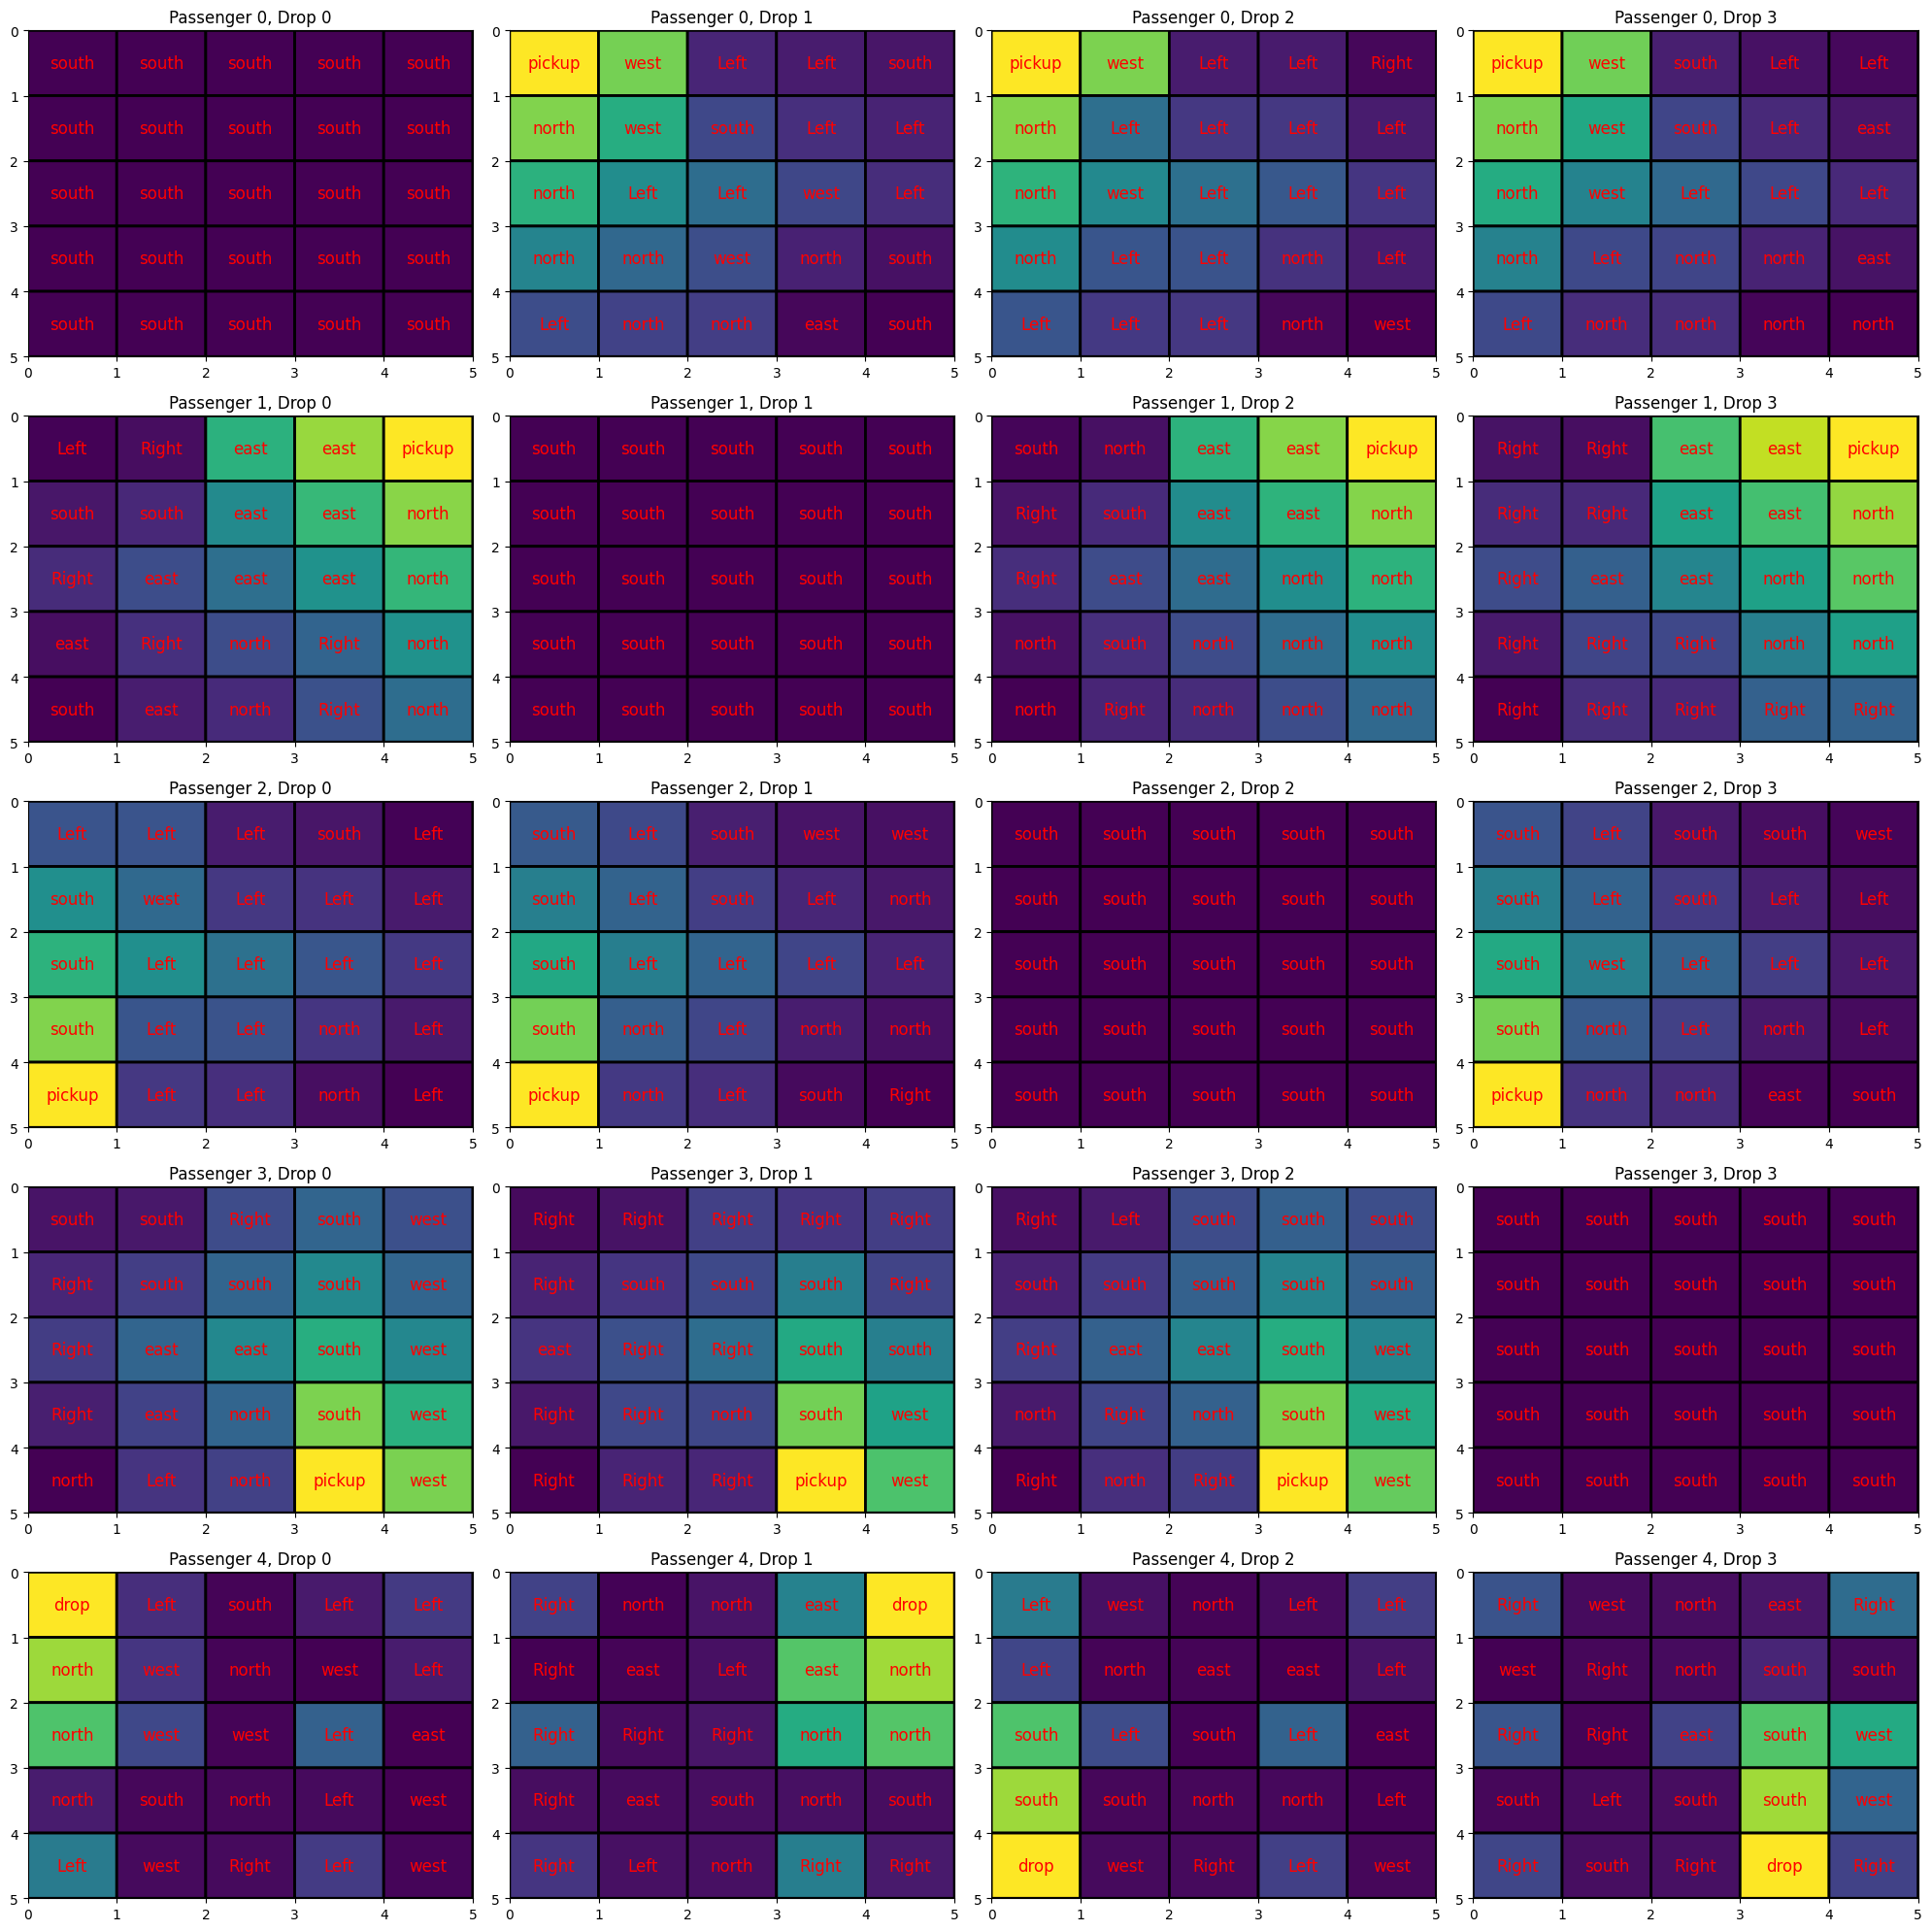

In [124]:

def visualize_SMDP_Q(q_values):
    actions = ["south", "north", "east", "west", 'pickup', 'drop', 'Left', 'Right']
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    for p in range(5):
        for d in range(4):
            Q = np.zeros((5, 5, 8))
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    Q[r, c] = q_values[state_num]

            ax = axes[p, d]
            ax.set_title(f"Passenger {p}, Drop {d}")
            ax.pcolor(Q.max(-1), edgecolors='k', linewidths=2)
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    anno = actions[np.argmax(Q[r, c])]
                    ax.text(c + 0.5, r + 0.5, anno, ha='center', va='center', color='red', size='large')
            ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


visualize_SMDP_Q(q_values_SMDP)


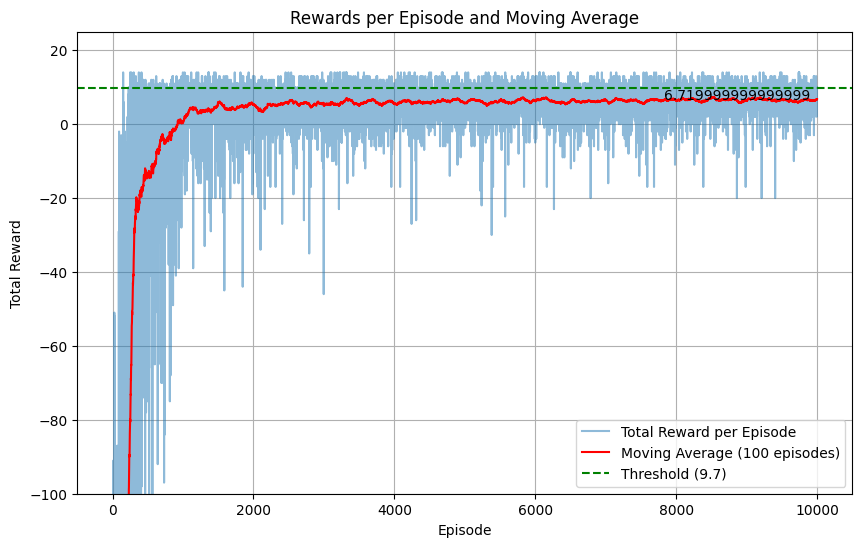

In [125]:
# Calculate the moving average of the last 100 episodes
moving_avg_SMDP = np.convolve(episode_rewards, np.ones(100)/100, mode='valid')

# Visualize the rewards per episode and the moving average
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label='Total Reward per Episode', alpha=0.5)
plt.plot(range(100, len(episode_rewards)+1), moving_avg_SMDP, color='red', label='Moving Average (100 episodes)')
plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.ylim(-100,25)
last_value = moving_avg_SMDP[-1]
plt.text(len(moving_avg) - 1, last_value, f'{last_value}', ha='right')
plt.show()

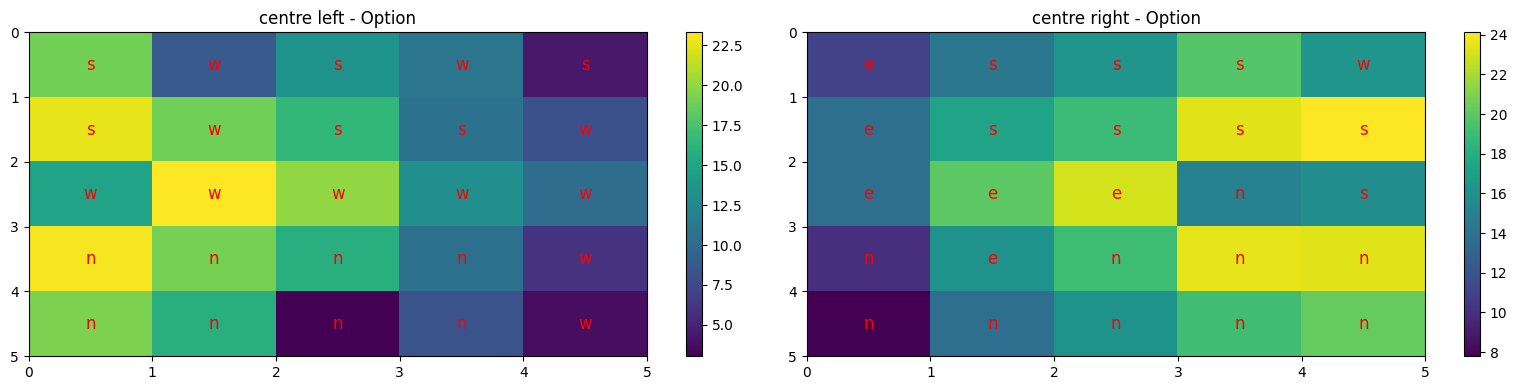

In [126]:
def plot_Q(Q_values, color_names, message="Q plot"):
    actions = ["south", "north", "east", "west"]

    fig, axes = plt.subplots(1, len(Q_values), figsize=(16, 4)) 

    for ax, q_value, color_name in zip(axes, Q_values, color_names):
        q_plot = np.zeros((5, 5, 4))
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                q_plot[i, j] = q_value[state_num]

        ax.set_title(f"{color_name} - {message}") 
        ax.pcolor(q_plot.max(-1), edgecolors='k', linewidths=2)
        plt.colorbar(ax.pcolor(q_plot.max(-1)), ax=ax)
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                if message == "Update Frequency":
                    anno = f'{np.sum(q_plot[i, j])}'
                    size = 'small'
                else:
                    anno = actions[np.argmax(q_plot[i, j])][0]
                    size = 'large'
                ax.text(j + 0.5, i + 0.5, anno, ha='center', va='center', color='red', size=size)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_Q([q_centre_left,q_centre_right], ["centre left","centre right"], "Option")


Intra-options 

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:08<00:00, 1184.49it/s]


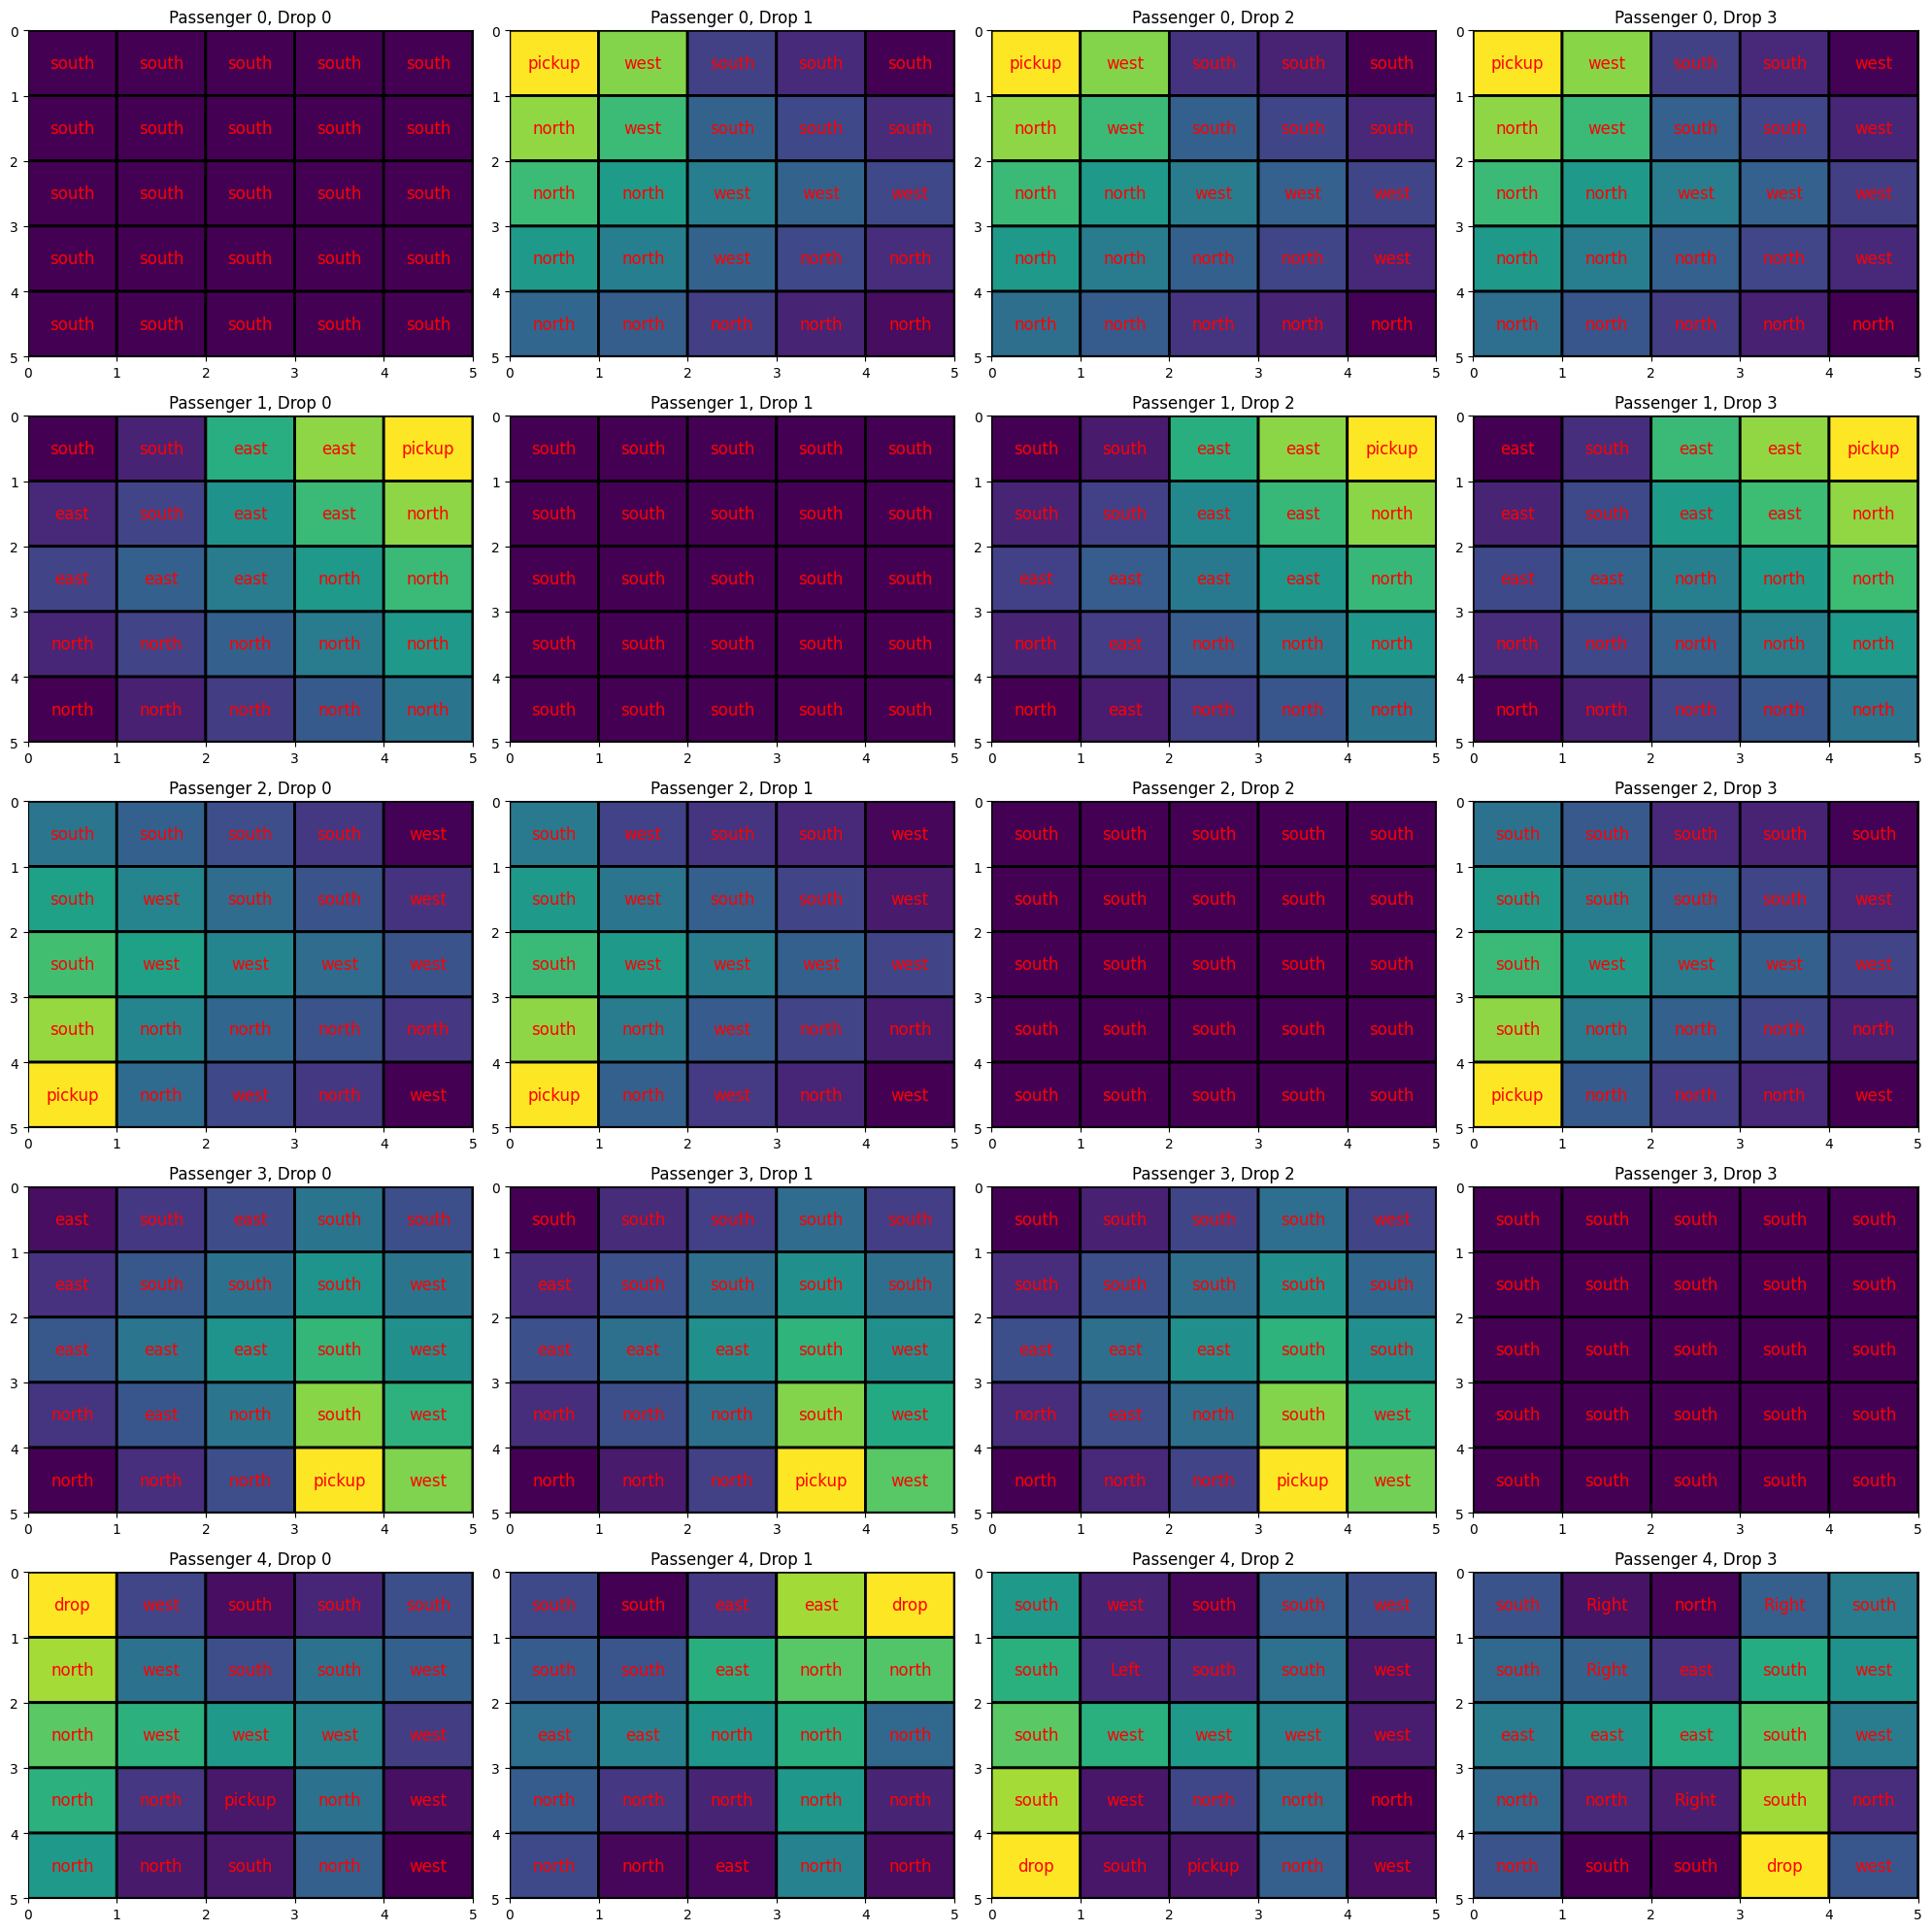

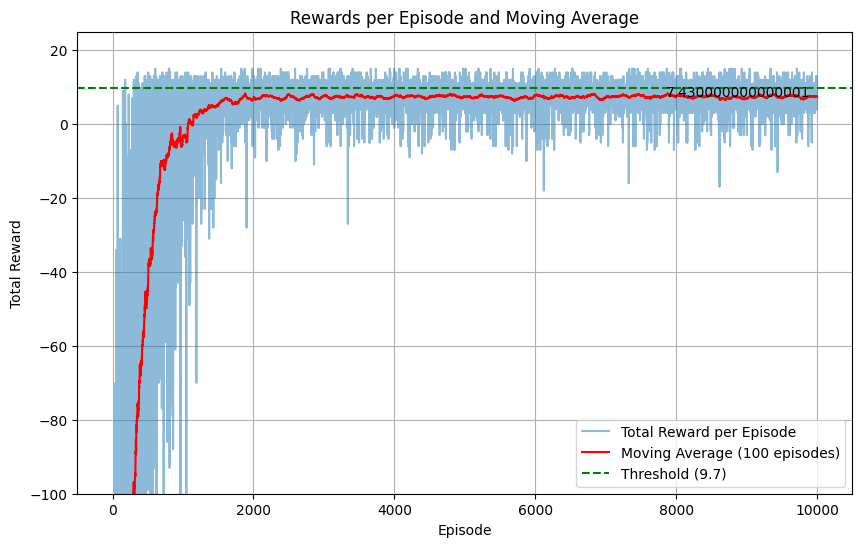

In [137]:

q_values_Intra = np.zeros((500,8))
q_centre_left=np.zeros((25,4))
q_centre_right=np.zeros((25,4))

# def egreedy_policy(Q,state,eps):
#     softmax_vals = [np.exp((Q[state][action] - np.max(Q[state]))/eps) for action in range(len(Q[state]))]
#     softmax_vals /= sum(softmax_vals)
#     return np.random.choice(len(Q[state]), p=softmax_vals)
def egreedy_policy(Q,state,eps):
    if np.random.rand() < eps:
        action = np.random.randint(0,8)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action
def egreedy__option_policy(Q,state,eps):
    # softmax_vals = [np.exp((Q[state][action] - np.max(Q[state]))/eps) for action in range(len(Q[state]))]
    # softmax_vals /= sum(softmax_vals)
    # return np.random.choice(len(Q[state]), p=softmax_vals)
    if np.random.rand() < eps:
        action = np.random.randint(0,4)  # Explore action space
    else:
        action = np.argmax(Q[state])  # Exploit learned values
    return action


def opt_done_1(state):
    optdone=False
    state_row,state_col,_,_=list(env.decode(state))
    if state_row==2:
        if  state_col<1:
            optdone=True
    return optdone

def opt_done_2(state):
    optdone=False
    state_row,state_col,_,_=list(env.decode(state))
    if state_row==2:
        if  state_col>=3:
            optdone=True
    return optdone

option_q_values = [q_centre_left,q_centre_right]


# Add parameters you might need here
gamma = 0.9
alpha=0.1
epsilon=0.1
eps1=0.1
eps2=0.1
eps3=0.1
eps4=0.1
decay=0.98
eps_min=0.01
episode_rewards_intra = []
goal_pos=[[0,0],[0,4],[4,3],[4,0]]
pseudo_reward = 50

# Iterate over 1000 episodes
for _ in tqdm(range(10000)):
    state,_ = env.reset()   
    total_reward_intra= 0

    done = False
    step_count=0

    # While episode is not over
    while not done :
        step_count+=1

        # Choose action        
        action = egreedy_policy(q_values_Intra, state,epsilon)
        epsilon=max(eps_min,epsilon*decay)

        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward,done,_,_ = env.step(action)
            q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            grid_state = state_row*5 + state_col
            next_state_row,next_state_col,_,_=list(env.decode(next_state))
            grid_next_state = next_state_row*5 + next_state_col
            next_state_pos=[next_state_row,next_state_col] 


            if np.argmax(q_centre_left[grid_state]) == action:
                if opt_done_1(next_state):
                    q_values_Intra[state][6]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6])
                else:
                    q_values_Intra[state][6]+=alpha*(reward+gamma*((q_values_Intra[next_state][6]))-q_values_Intra[state][6])

            if np.argmax(q_centre_right[grid_state]) == action:
                if opt_done_2(next_state):
                    q_values_Intra[state][7]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][7])
                else:
                    q_values_Intra[state][7]+=alpha*(reward+gamma*((q_values_Intra[next_state][7]))-q_values_Intra[state][7])

            total_reward_intra += reward
            state=next_state
            
        if action == 6: # action => centre left
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            
            if opt_done_1(state):
                q_values_Intra[state][6]=-100
                continue
            
         
            while not opt_done_1(state) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_centre_left,state_no,eps1)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                for i in range(len(option_q_values)):
                    if i==0:
                        if opt_done_1(next_state):
                            q_values_Intra[state][6] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][6])
                        else:
                            q_values_Intra[state][6] += alpha * (reward + gamma * q_values_Intra[next_state][6] - q_values_Intra[state][6])
                    else:
                        if np.argmax(option_q_values[i][state_no]) == action:
                            if opt_done_2(next_state):
                                q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                            else:
                                q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])


                q_values_Intra[state][action] += alpha * (reward+ gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                if opt_done_1(next_state):
                    reward = 20
                q_centre_left[state_no][action] += alpha * (reward + gamma * np.max(q_centre_left[next_state_no]) - q_centre_left[state_no][action])
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]

        if action == 7: # action => centre left
            k=0
            state_row,state_col,_,_=list(env.decode(state))
            pos=[state_row,state_col]
            
            if opt_done_2(state):
                q_values_Intra[state][7]=-100
                continue
            
         
            while not opt_done_2(state) :
             
                k+=1
                state_no=state_row*5+state_col
                action=egreedy__option_policy(q_centre_right,state_no,eps1)
                next_state, reward,done,_,_ = env.step(action)
                state_row,state_col,_,_=list(env.decode(next_state))
                next_state_no=state_row*5+state_col
                next_state_pos=[state_row,state_col]
                
                for i in range(len(option_q_values)):
                    if i==0:
                        if opt_done_2(next_state):
                            q_values_Intra[state][7] += alpha * (reward  + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][7])
                        else:
                            q_values_Intra[state][7] += alpha * (reward + gamma * q_values_Intra[next_state][7] - q_values_Intra[state][7])
                    else:
                        if np.argmax(option_q_values[i][state_no]) == action:
                            if opt_done_1(next_state):
                                q_values_Intra[state][6+i]+=alpha*(reward+gamma*(np.max(q_values_Intra[next_state]))-q_values_Intra[state][6+i])
                            else:
                                q_values_Intra[state][6+i]+=alpha*(reward+gamma*((q_values_Intra[next_state][6+i]))-q_values_Intra[state][6+i])

                q_values_Intra[state][action] += alpha * (reward + gamma * np.max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                total_reward_intra += reward
                if opt_done_2(next_state):
                    reward = 20
                q_centre_right[state_no][action] += alpha * (reward + gamma * np.max(q_centre_right[next_state_no]) - q_centre_right[state_no][action])
                state = next_state
                state_row,state_col,_,_=list(env.decode(state))
                pos=[state_row,state_col]

    episode_rewards_intra.append(total_reward_intra)
   
    

def visualize_SMDP_Q(q_values):
    actions = ["south", "north", "east", "west", 'pickup', 'drop', 'Left', 'Right']
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

    for p in range(5):
        for d in range(4):
            Q = np.zeros((5, 5, 8))
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    Q[r, c] = q_values[state_num]

            ax = axes[p, d]
            ax.set_title(f"Passenger {p}, Drop {d}")
            ax.pcolor(Q.max(-1), edgecolors='k', linewidths=2)
            for r in range(5):
                for c in range(5):
                    state_num = 100 * r + 20 * c + 4 * p + d
                    anno = actions[np.argmax(Q[r, c])]
                    ax.text(c + 0.5, r + 0.5, anno, ha='center', va='center', color='red', size='large')
            ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


visualize_SMDP_Q(q_values_Intra)

# Calculate the moving average of the last 100 episodes
moving_avg_intra = np.convolve(episode_rewards_intra, np.ones(100)/100, mode='valid')

# Visualize the rewards per episode and the moving average
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_intra, label='Total Reward per Episode', alpha=0.5)
plt.plot(range(100, len(episode_rewards_intra)+1), moving_avg_intra, color='red', label='Moving Average (100 episodes)')
plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.ylim(-100,25)
last_value = moving_avg_intra[-1]
plt.text(len(moving_avg) - 1, last_value, f'{last_value}', ha='right')
plt.show()

In [139]:
print(moving_avg_intra[-1])

7.430000000000001


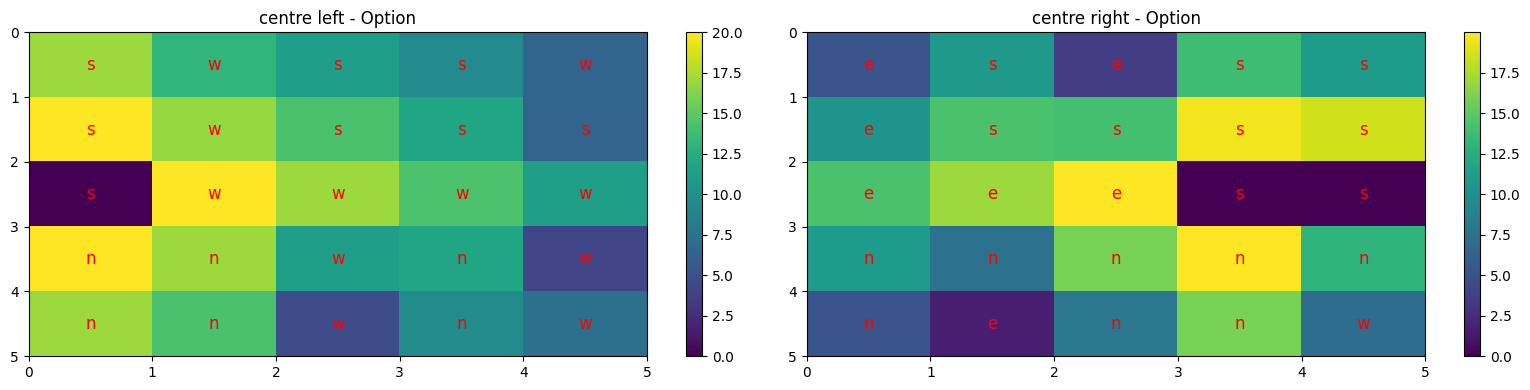

In [129]:
def plot_Q(Q_values, color_names, message="Q plot"):
    actions = ["south", "north", "east", "west"]

    fig, axes = plt.subplots(1, len(Q_values), figsize=(16, 4)) 

    for ax, q_value, color_name in zip(axes, Q_values, color_names):
        q_plot = np.zeros((5, 5, 4))
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                q_plot[i, j] = q_value[state_num]

        ax.set_title(f"{color_name} - {message}") 
        ax.pcolor(q_plot.max(-1), edgecolors='k', linewidths=2)
        plt.colorbar(ax.pcolor(q_plot.max(-1)), ax=ax)
        for i in range(5):
            for j in range(5):
                state_num = i * 5 + j
                if message == "Update Frequency":
                    anno = f'{np.sum(q_plot[i, j])}'
                    size = 'small'
                else:
                    anno = actions[np.argmax(q_plot[i, j])][0]
                    size = 'large'
                ax.text(j + 0.5, i + 0.5, anno, ha='center', va='center', color='red', size=size)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

# Example usage
plot_Q([q_centre_left,q_centre_right], ["centre left","centre right"], "Option")


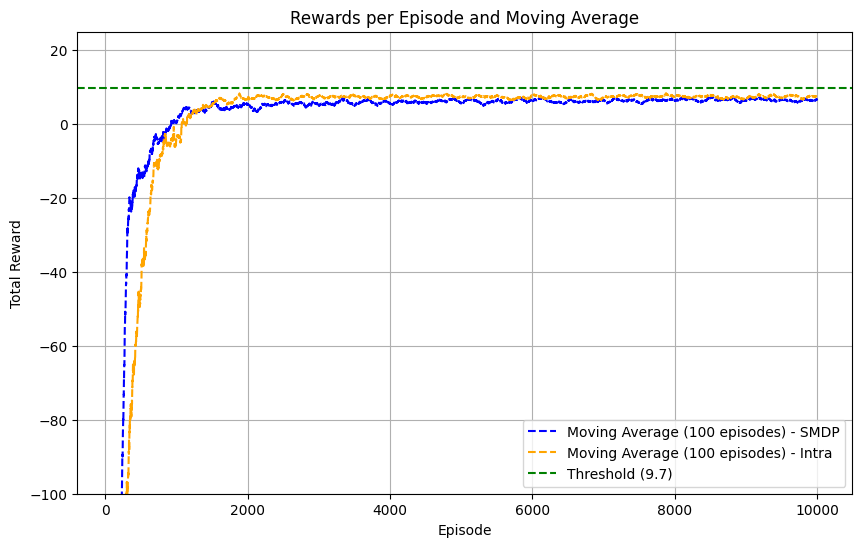

In [138]:
plt.figure(figsize=(10, 6))
#plt.plot(episode_rewards, label='Total Reward per Episode', alpha=0.5, color='blue')
plt.plot(range(100, len(episode_rewards)+1), moving_avg_SMDP, color='blue', linestyle='--', label='Moving Average (100 episodes) - SMDP')

#plt.plot(episode_rewards_intra, label='Total Reward per Episode (Intra)', alpha=0.5, color='orange')
plt.plot(range(100, len(episode_rewards_intra)+1), moving_avg_intra, color='orange', linestyle='--', label='Moving Average (100 episodes) - Intra')

plt.axhline(y=9.7, color='green', linestyle='--', label='Threshold (9.7)')
plt.title('Rewards per Episode and Moving Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.ylim(-100, 25)
plt.show()